### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [11]:
def faturamento(loja):
    return loja['Preço'].sum()

lojas = [loja1, loja2, loja3, loja4]

for loja in lojas:
  print(faturamento(loja))


1534509.12
1488459.06
1464025.03
1384497.58


# 2. Vendas por Categoria

In [13]:

def vendas_por_categoria(loja):
    return loja['Categoria do Produto'].value_counts().sort_values()

df_qnt_vendida_por_categoria = pd.DataFrame(
    {
        "Loja 1": vendas_por_categoria(loja1),
        "Loja 2": vendas_por_categoria(loja2),
        "Loja 3": vendas_por_categoria(loja3),
        "Loja 4": vendas_por_categoria(loja4),
    }
)

In [14]:
df_qnt_vendida_por_categoria

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


In [17]:
df_qnt_vendida_por_categoria = df_qnt_vendida_por_categoria.sort_values(by='Loja 1', ascending=False)
df_qnt_vendida_por_categoria

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
utilidades domesticas,171,181,177,201


# 3. Média de Avaliação das Lojas


In [18]:
def media_avaliacao(loja):
     return round(loja['Avaliação da compra'].mean(),2)

In [20]:
for loja in lojas:
  print(media_avaliacao(loja))


3.98
4.04
4.05
4.0


# 4. Produtos Mais e Menos Vendidos

In [24]:
resumo = []

def mais_menos_vendidos(loja, numero):
    loja = loja.rename(columns={'Categoria do Produto': 'Categoria_do_produto'})
    contagem = loja.Categoria_do_produto.value_counts()
    mais_vendido = contagem.head(1)
    menos_vendido = contagem.tail(1)
    return mais_vendido, menos_vendido

for i in range(len(lojas)):

    mais, menos = mais_menos_vendidos(lojas[i], i+1)

    dados_loja = {
        "Loja": i+1,
        "Faturamento": faturamento(lojas[i]),
        "Media Avaliação": media_avaliacao(lojas[i]),
        "Frete Médio": frete_medio(lojas[i]),
        "Produto mais vendido": mais.index[0],
        "Qnt mais vendido": mais.values[0],
        "Produto menos vendido": menos.index[0],
        "Qnt menos vendido": menos.values[0]
    }
    resumo.append(dados_loja)

# Convertendo em DataFrame
df_resumo = pd.DataFrame(resumo)
df_resumo = df_resumo.set_index("Loja")


In [25]:
df_resumo

,Faturamento,Media Avaliação,Frete Médio,Produto mais vendido,Qnt mais vendido,Produto menos vendido,Qnt menos vendido
Loja,,,,,,,
1,1534509.12,3.98,34.69,moveis,465,utilidades domesticas,171
2,1488459.06,4.04,33.62,moveis,442,utilidades domesticas,181
3,1464025.03,4.05,33.07,moveis,499,utilidades domesticas,177
4,1384497.58,4.00,31.28,moveis,480,instrumentos musicais,170


# 5. Frete Médio por Loja

In [21]:
def frete_medio(loja):
    return round(loja['Frete'].mean(),2)

In [22]:
for loja in lojas:
  print(frete_medio(loja))


34.69
33.62
33.07
31.28


Para facilitar a visualização, criei um data frama adicional:

In [27]:
def faturamento_por_categoria(loja):
    return loja.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

df_faturamento_por_categoria = pd.DataFrame(
    {
        "Loja 1": faturamento_por_categoria(loja1),
        "Loja 2": faturamento_por_categoria(loja2),
        "Loja 3": faturamento_por_categoria(loja3),
        "Loja 4": faturamento_por_categoria(loja4),
    }
)

df_percentual = df_faturamento_por_categoria.div(df_faturamento_por_categoria.sum(axis=0), axis=1) * 100

df_completo = pd.concat(
    [df_qnt_vendida_por_categoria, df_faturamento_por_categoria, df_percentual],
    axis=1,
    keys=["Quantidade Vendida", "Faturamento", "Perc de faturamento"]
)

print(df_completo)

                      Quantidade Vendida                      Faturamento  \
                                  Loja 1 Loja 2 Loja 3 Loja 4      Loja 1   
Categoria do Produto                                                        
moveis                               465    442    499    480   250178.11   
eletronicos                          448    422    451    451   572659.23   
brinquedos                           324    313    315    338    23993.78   
eletrodomesticos                     312    305    278    254   484913.36   
esporte e lazer                      284    275    277    277    52387.55   
instrumentos musicais                182    224    177    170   121731.69   
livros                               173    197    185    187    11713.92   
utilidades domesticas                171    181    177    201    16931.48   

                                                       Perc de faturamento  \
                          Loja 2     Loja 3     Loja 4              Loja 1

Gráficos

<Axes: title={'center': 'Faturamento total por loja'}, xlabel='Faturamento total', ylabel='Loja'>

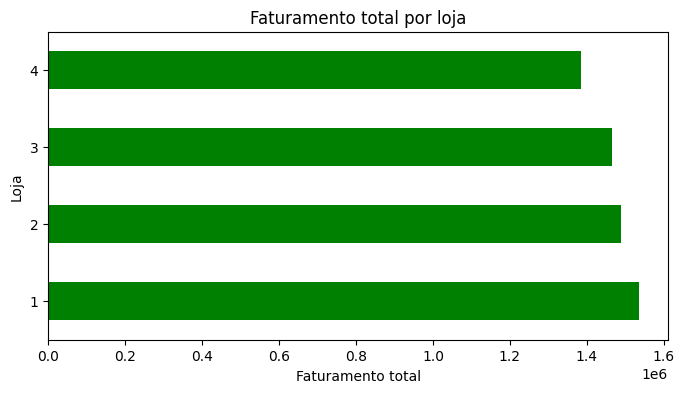

In [28]:

import matplotlib.pyplot as plt

#gráfico loja x faturamento
df_resumo_faturamento = df_resumo['Faturamento']
df_resumo_faturamento.plot(kind="barh", figsize=(8,4), color= 'green', xlabel='Faturamento total', ylabel='Loja', title="Faturamento total por loja")

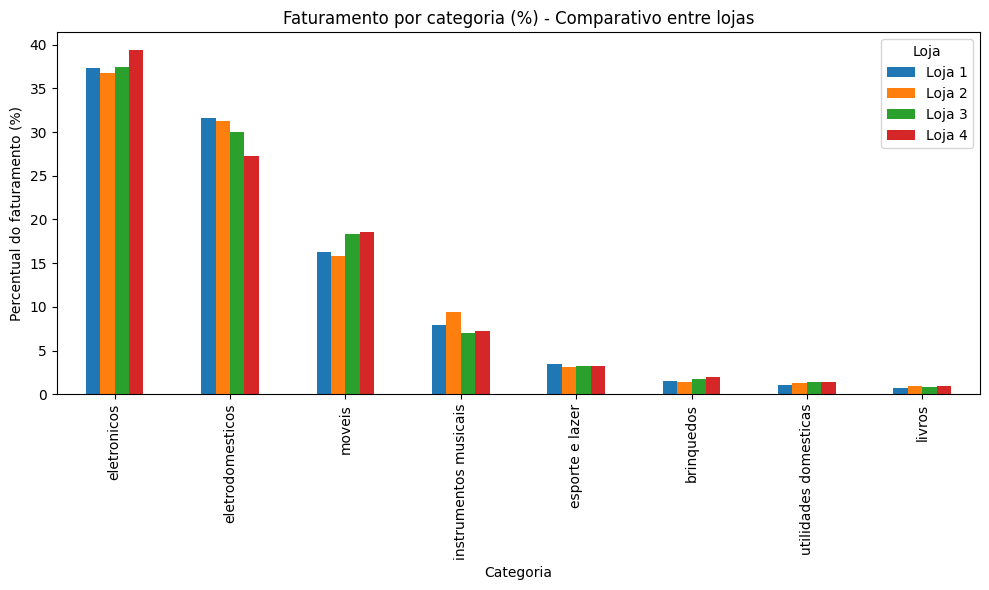

In [29]:
df_percentual.plot(
    kind='bar',
    figsize=(10, 6)
)

plt.xlabel('Categoria')
plt.ylabel('Percentual do faturamento (%)')
plt.title('Faturamento por categoria (%) - Comparativo entre lojas')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

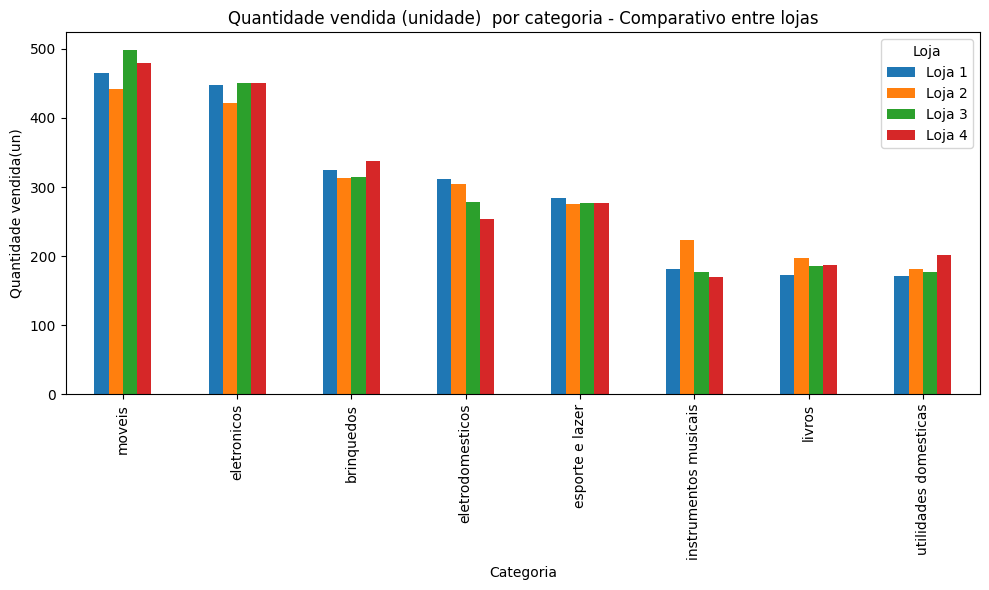

In [30]:
df_qnt_vendida_por_categoria.plot(
    kind="bar", figsize=(10,6))
plt.xlabel('Categoria')
plt.ylabel('Quantidade vendida(un)')
plt.title('Quantidade vendida (unidade)  por categoria - Comparativo entre lojas')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

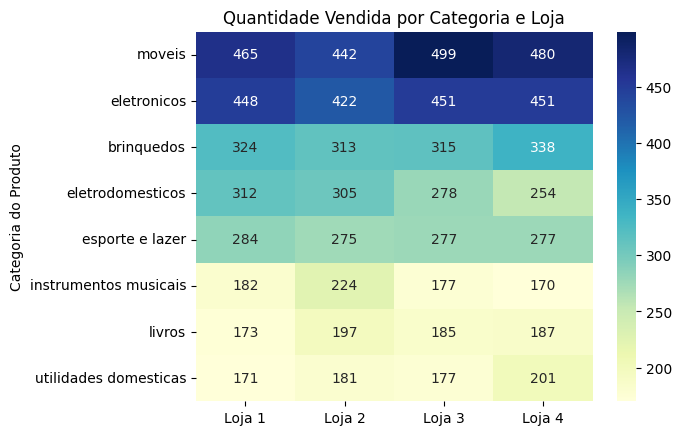

In [31]:
import seaborn as sns

sns.heatmap(df_qnt_vendida_por_categoria, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Quantidade Vendida por Categoria e Loja")
plt.show()

In [ ]:
Extra - análise de desempenho geográfico por loja e por estado

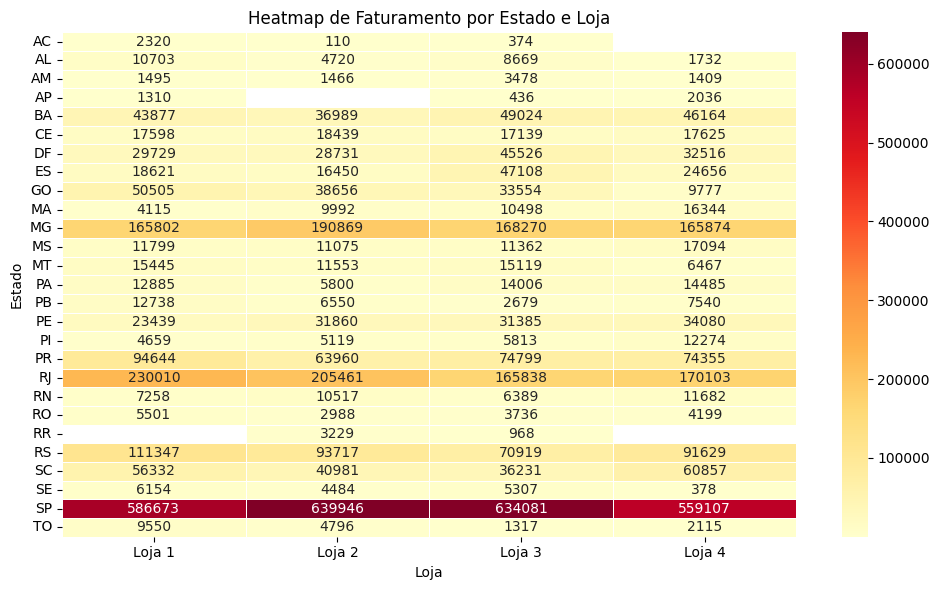

In [25]:
import pandas as pd

loja1["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

df_total = pd.concat([loja1, loja2, loja3, loja4])

df_total

tabela_fat = pd.pivot_table(
    df_total,
    index="Local da compra",
    columns="loja",
    values="Preço",
    aggfunc="sum"
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.heatmap(
    tabela_fat,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("Heatmap de Faturamento por Estado e Loja")
plt.xlabel("Loja")
plt.ylabel("Estado")
plt.tight_layout()
plt.show()





Relatório Final

Fui contratada para identificar uma loja da AluraStore para fechar, pois Sr João quer investir em outra loja.

Pelos dados e gráficos, notei que a loja 1 possui maior faturamento apesar de ter menor nota de avaliação e maior frete. Isso se dá devido a venda de produtos com maior valor, como eletrônicos.
Já a loja 4, apesar de ter menor frete médio e boa média de avaliação, possui o menor faturamento de todas, assim, recomendo vender esta loja.
